In [44]:
"""
Created on Wed Sep 27 

@author: paola 

Calculate the luminosity normalized that we will use in the blue (BB) curve.

NOTES FOR OTHERS:
- All the functions have to be applied to a CELL
- arguments are in cgs, NOT in log.
"""

'\nCreated on Wed Sep 27 \n\n@author: paola \n\nCalculate the luminosity normalized that we will use in the blue (BB) curve.\n\nNOTES FOR OTHERS:\n- All the functions have to be applied to a CELL\n- arguments are in cgs, NOT in log.\n'

In [45]:
# Vanilla imports
import numpy as np
import matplotlib.pyplot as plt

# Chocolate imports
from src.Luminosity.photosphere import get_photosphere
from src.Optical_Depth.opacity_table import opacity

# Constants
c = 2.9979e10 #[cm/s]
h = 6.6261e-27 #[gcm^2/s]
Kb = 1.3806e-16 #[gcm^2/s^2K]
alpha = 7.5646 * 10**(-15) # radiation density [erg/cm^3K^4]
Rsol_to_cm = 6.957e10


In [46]:
# VARIABLES: frequencies [Hz]
n_min = 1e12 
n_max = 1e18
n_spacing = 10000
#n_array = np.linspace(n_min, n_max, num = n_spacing)
#n_logspace = np.log10(n_array)
n_linear_in_log = np.linspace(np.log10(n_min), np.log10(n_max), num = n_spacing)

In [47]:
# FUNCTIONS

def select_fix(m):
    if m == 4:
        snapshots = np.arange(233,263+1)
        days = [1.015, 1.025, 1.0325, 1.0435, 1.0525, 1.06, 1.07, 1.08, 1.0875, 1.0975, 1.1075, 1.115, 1.125, 1.135, 1.1425, 1.1525, 1.1625, 1.17, 1.18, 1.19, 1.1975, 1.2075, 1.2175, 1.2275, 1.235, 1.245, 1.255, 1.2625, 1.2725, 1.2825, 1.29] #t/t_fb
    if m == 6:
        snapshots = [844, 881, 925, 950, 1006]
        days = [1.00325, 1.13975, 1.302, 1.39425, 1.60075] #t/t_fb
    return snapshots, days

def emissivity(Temperature, Density, cell_vol):
    """ Gives emissivity in a cell. """
    k_planck = opacity(Temperature, Density, 'planck', ln = False)
    emiss = alpha * c * Temperature**4 * k_planck * cell_vol
    return emiss

def planck_fun_n_cell(Temperature: float, n: float) -> float:
    """ Planck function in a cell. """
    const = 2*h/c**2
    fun = const * n**3 / (np.exp(h*n/(Kb*Temperature))-1)
    return fun

In [48]:
s,d = select_fix(4)
len(d)

31

In [49]:
# Check how plots look: use n_array AND THEN LOGLOG

# fig, axs = plt.subplots(1,2)
# fig.subplots_adjust(wspace = 0.5)
# axs[0].plot(n_array, planck_fun_n_cell(1e6, n_array))
# axs[0].set_title('n_array')
# axs[0].loglog()
# axs[1].plot(n_logspace, planck_fun_n_cell(1e6, n_array))
# axs[1].set_title('n_logspace')
# axs[1].set_yscale('log')

# print(find_peak(1e6))

In [50]:
# def real_planck_fun_cell(Temperature: float) -> float:
#     """
#     Bolometric planck function in a cell B(T) without changing integrand.
#     """
#     n_Bn_array = []
    
#     for n in n_array:
#         n_Bn = planck_fun_n_cell(Temperature, n)
#         n_Bn_array.append(n_Bn)
        
#     # Integrate
#     n_Bn_array = np.array(n_Bn_array) # Make arr, to intergrate
#     fun = np.trapz(n_Bn_array, n_array)
#     return fun


In [51]:
# def planck_fun_cell(Temperature: float) -> float:
#     """
#     Bolometric planck function in a cell: B(T).
#     """
#     n_Bn_array = []
    
#     for n in n_array:
#         n_Bn = n * planck_fun_n_cell(Temperature, n)
#         n_Bn_array.append(n_Bn)
        
#     # Integrate
#     n_Bn_array = np.array(n_Bn_array) # Make arr, to intergrate
#     fun = np.trapz(n_Bn_array, n_logspace)
#     return fun

In [52]:
# # Check the mess with integration of B: almost the same thus we don't have problem integrating beyond the peak
# def test_peak(Temperature: float) -> float:
#     """
#     Bolometric planck function in a cell: B(T).
#     """
#     n_Bn_array = []
#     peak = find_peak(Temperature)
    
#     for n in n_array:
#         if n > peak:
#             n_Bn = 0 
#         else:
#             n_Bn = n * old_planck_fun_n_cell(Temperature, n)
#         n_Bn_array.append(n_Bn)
        
#     # Integrate
#     n_Bn_array = np.array(n_Bn_array) # Make arr, to intergrate
#     fun = np.trapz(n_Bn_array, n_logspace)
#     return fun

# a = old_planck_fun_cell(1e6)
# b = test_peak(1e6)
# print("B all frequencies: ", a)
# print("B cut at the peak: ", b)

In [53]:
# Is it correct to use n_logspace? Almost, but no because the interval don't match. We define our trapz
def hand_integration(fun, arr):
    """ Apply trapz rule on fun = f(arr) for not evenly space x"""
    F = 0
    
    for i in range(1,len(arr)):
        delta_x = arr[i]-arr[i-1]
        f_step = (fun[i] + fun[i-1]) * delta_x / 2
        F += f_step
        
    return F

In [54]:
# def luminosity_n(Temperature: float, Density: float, tau: float, volume: float, n:int):
#     """ Luminosity in a cell. """
#     epsilon = emissivity(Temperature, Density, volume)
#     lum_cell = epsilon * planck_fun_n_cell(Temperature, n) * np.exp(-tau)
#     return (lum_cell/planck_fun_cell(Temperature))
    

In [55]:
def Elena_luminosity_n(Temperature: float, Density: float, tau: float, volume: float, n:int):
    k_planck = opacity(Temperature, Density, 'planck', ln = False)
    L = 4 * np.pi * k_planck * volume * np.exp(-tau) * planck_fun_n_cell(Temperature, n)
    return L

In [56]:
def final_normalisation(L_n: np.array, luminosity_fld: float) -> float:
    """ Given the array of luminosity L_n computed over 10^{n_lin_in_log} (!!!), find the normalisation constant from FLD model used for L_tilde_nu. """  
    n_L_n = np.log(10) * 10**(n_linear_in_log) * L_n
    L = np.trapz(n_L_n, n_linear_in_log) 
    norm = luminosity_fld / L
    return norm

In [57]:
# def TEST_final_norm(L_n: np.array, luminosity_fld: float):
#     L = np.trapz(L_n, n_array)
#     norm = luminosity_fld / L
#     return  norm

In [58]:
# def final_normalisation(L_n: np.array, luminosity_fld: float) -> float:
#     """ Given the array of luminosity L_n computed over n_array (!!!), find the normalisation constant from FLD model used for L_tilde_nu. """  
#     n_L_n = np.log(10) * n_array * L_n
#     L = np.trapz(n_L_n, n_logspace) 
#     norm = luminosity_fld / L
#     return norm

# OLD MAIN
# if __name__ == "__main__":
#     m = 4
#     fix_index = 0

#     snapshots, days = select_fix(m)
#     fld_data = np.loadtxt('reddata_m'+ str(m) +'.txt')
#     fix = snapshots[fix_index]
#     luminosity_fld_fix = fld_data[1]
#     rays_den, rays_T, rays_tau, photosphere, radii = get_photosphere(fix, m)
#     dr = (radii[1] - radii[0]) * Rsol_to_cm
#     volume = 4 * np.pi * radii**2 * dr  / 192

#     lum_n = np.zeros(len(n_logspace))
#     for j in range(len(rays_den)):
#         for i in range(len(rays_tau[j])):        
#             # Temperature, Density and volume: np.array from near to the BH to far away. Thus we will use negative index in the for loop.
#             # tau: np.array from outside to inside.      
#             T = rays_T[j][-i]
#             rho = rays_den[j][-i] 
#             opt_depth = rays_tau[j][i]
#             cell_vol = volume[-i]

#             # Ensure we can interpolate
#             rho_low = np.exp(-22)
#             T_low = np.exp(8.77)
#             T_high = np.exp(17.8)
#             if rho < rho_low or T < T_low or T > T_high:
#                 continue

#             for n_index in range(len(n_array)):
#                 # lum_n_cell = luminosity_n(T, rho, opt_depth, cell_vol, n_array[n_index])
#                 lum_n_cell = Elena_luminosity_n(T, rho, opt_depth, cell_vol, n_array[n_index])
#                 lum_n[n_index] += lum_n_cell
        
#         # print('ray:', j)

#     # Normalisation
#     const_norm = final_normalisation(lum_n, luminosity_fld_fix[fix_index])
#     #const_norm = TEST_final_norm(lum_n, luminosity_fld_fix[fix_index])
#     lum_tilde_n = lum_n *  const_norm

In [59]:
# MAIN
if __name__ == "__main__":
    m = 4
    fix_index = 29

    snapshots, days = select_fix(m)
    fld_data = np.loadtxt('reddata_m'+ str(m) +'.txt')
    fix = snapshots[fix_index]
    luminosity_fld_fix = fld_data[1]
    rays_den, rays_T, rays_tau, photosphere, radii = get_photosphere(fix, m)
    dr = (radii[1] - radii[0]) * Rsol_to_cm
    volume = 4 * np.pi * radii**2 * dr  / 192

    lum_n = np.zeros(len(n_linear_in_log))
    for j in range(len(rays_den)):
        for i in range(len(rays_tau[j])):        
            # Temperature, Density and volume: np.array from near to the BH to far away. Thus we will use negative index in the for loop.
            # tau: np.array from outside to inside.      
            T = rays_T[j][-i]
            print(T)
            rho = rays_den[j][-i] 
            opt_depth = rays_tau[j][i]
            cell_vol = volume[-i]

            # Ensure we can interpolate
            rho_low = np.exp(-22)
            T_low = np.exp(8.77)
            T_high = np.exp(17.8)
            if rho < rho_low or T < T_low or T > T_high:
                continue
            
            for n_index in range(len(n_linear_in_log)): #we need linearspace
                # lum_n_cell = luminosity_n(T, rho, opt_depth, cell_vol, n_array[n_index])
                freq = 10**n_linear_in_log[n_index]
                lum_n_cell = Elena_luminosity_n(T, rho, opt_depth, cell_vol, freq)
                lum_n[n_index] += lum_n_cell
        
        # print('ray:', j)



Shape Ray: (192, 350)


/Users/paolamartire/tde_comparison/src/Luminosity/photosphere.py:61: RuntimeWarning: divide by zero encountered in log
  logT = np.log(T)
/Users/paolamartire/tde_comparison/src/Luminosity/photosphere.py:63: RuntimeWarning: divide by zero encountered in log
  logrho = np.log(rho)


287318612.7735069
3184167213.62756
4762277970.205806
3535930798.099145
2916030385.0655155
3501549450.9854803
3340946460.196691
1587453689.5130713
1800934916.0361688
1605867179.5491111
3593579127.860062
1206929423.575447
1170125566.9735422
2793683125.64119
0.0
938451766.4118923
1353723237.8795807
840703667.5901444
1233592900.140553
590577002.3667972
527417726.383408
603548552.0910482
561092584.9292562
487071383.912269
455465697.2560455
636938793.0934737
481996249.31953895
411633747.6554052
442638390.66809237
410839064.9888609
404352320.46697265
422510741.4747437
396686920.60229826
459623730.59226125
381924646.577423
408279071.2355456
372148200.1386018
358073954.88812524
432414914.89703614
383141677.5775151
343267022.65011847
0.0
357014286.5205631
431600283.7454779
482850237.5597019
450559402.79890573
359681194.82079816
444604624.80759966
376703882.9447189
0.0
424158624.86670643
431829236.17888474
0.0
384442797.5298697
418989535.45675683
441461718.01970387
434555399.4683877
382801652.219

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_84554/1567479886.py:21: RuntimeWarning: overflow encountered in exp
  fun = const * n**3 / (np.exp(h*n/(Kb*Temperature))-1)


15270.445728169485
15354.034495371512
15567.645044196603
16675.61978381746
22273.713760812312
54510.61541696713
106878.644426512
117673.72611560125
122024.2475533824
128497.48172684576
136416.99575454317
146606.28580701965
158928.54061970598
172800.7448081814
188160.72095994133
205608.46918288883
225040.7502405335
244771.3631588288
261433.88040721277
267985.53431136947
271234.7448973584
283238.8501849266
317675.1331027119
514348.3116063709
1226.9020678926172
1233.217857936234
0.0
1225.1368603038784
1225.0395452829528
1225.8285199969464
2064.164392382335
0.0
1226.4490394378001
1948.6624498164629
1244.2722016253229
4610.09879750736
1236.5250930446282
5627.280649355852
3650.8297539269747
1243.7734123771402
1224.9604730629158
1231.205645539409
1258.9156297524057
0.0
4141.999164095304
2930.5744390598816
0.0
1379.9959029892764
0.0
5627.48573052432
3644.4741940182194
4816.108910658533
1277.5950119062506
5627.500825577077
5627.518874995508
3183.032251109045
5627.525286519009
5627.5426877752925

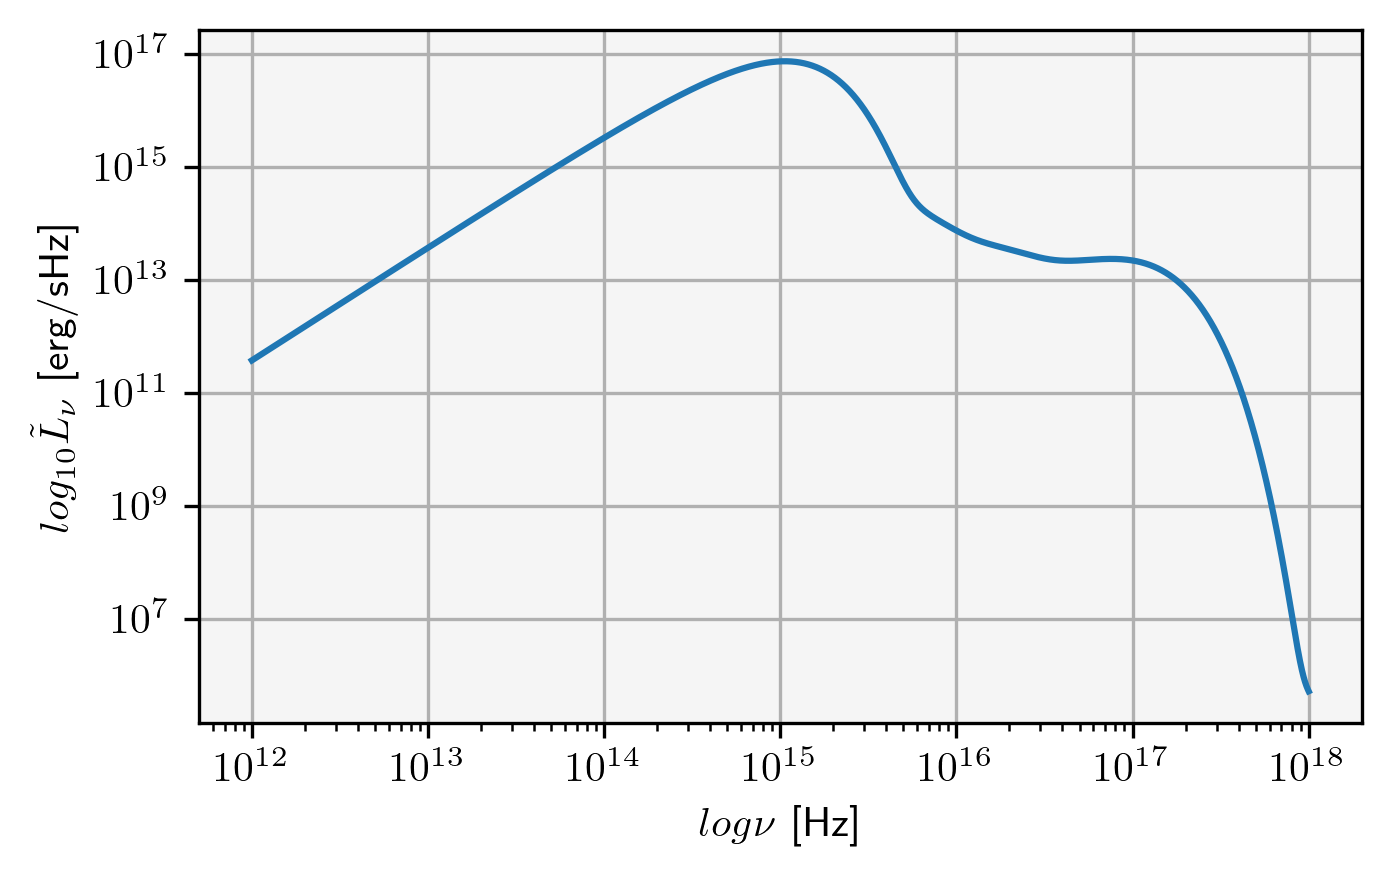

In [37]:
fig, ax = plt.subplots()
ax.plot(10**n_linear_in_log, lum_n)
plt.xlabel(r'$log\nu$ [Hz]')
plt.ylabel(r'$log_{10}\tilde{L}_\nu$ [erg/sHz]')
plt.loglog()
plt.grid()
#plt.text(1e12, 1e24, r'$t/t_{fb}:$ ' + f'{days[fix_index]}\n B: {check}')
# plt.legend()
plt.savefig('Ltildan_m' + str(m) + '_snap' + str(fix))
plt.show()
ax.axvline(15, color = 'tab:orange')
ax.axvline(17, color = 'tab:orange')
ax.axvspan(15, 17, alpha=0.5, color = 'tab:orange')

In [38]:
with open('Lum_n_m'+ str(m) + '.txt', 'a') as f:
    # f.write(' '.join(map(str, n_linear_in_log)) + '\n')
    f.write('#snap '+ str(fix) + ' L_tilde_n \n')
    f.write(' '.join(map(str, lum_n)) + '\n')
    f.close()

In [39]:
# Normalisation
const_norm = final_normalisation(lum_n, luminosity_fld_fix[fix_index])
#const_norm = TEST_final_norm(lum_n, luminosity_fld_fix[fix_index])
lum_tilde_n = lum_n *  const_norm

In [40]:
with open('L_tilde_n_m'+ str(m) + '.txt', 'a') as f:
    # f.write(' '.join(map(str, n_linear_in_log)) + '\n')
    f.write('#snap '+ str(fix) + ' L_tilde_n \n')
    f.write(' '.join(map(str, lum_tilde_n)) + '\n')
    f.close()

In [41]:
fin_int = np.log(10) * 10**(n_linear_in_log) * lum_tilde_n
# check = np.trapz(fin_int, n_linear_in_log)
check = hand_integration(fin_int, n_linear_in_log)
check="{:.2e}".format(check) #scientific notation
print('bolometric L', check)

bolometric L 2.45e+41


In [42]:
with open('L_m' + str(m) + '.txt', 'a') as fbolo:
    fbolo.write('#snap '+ str(fix) + '\n')
    fbolo.write(check + '\n')
    fbolo.close()

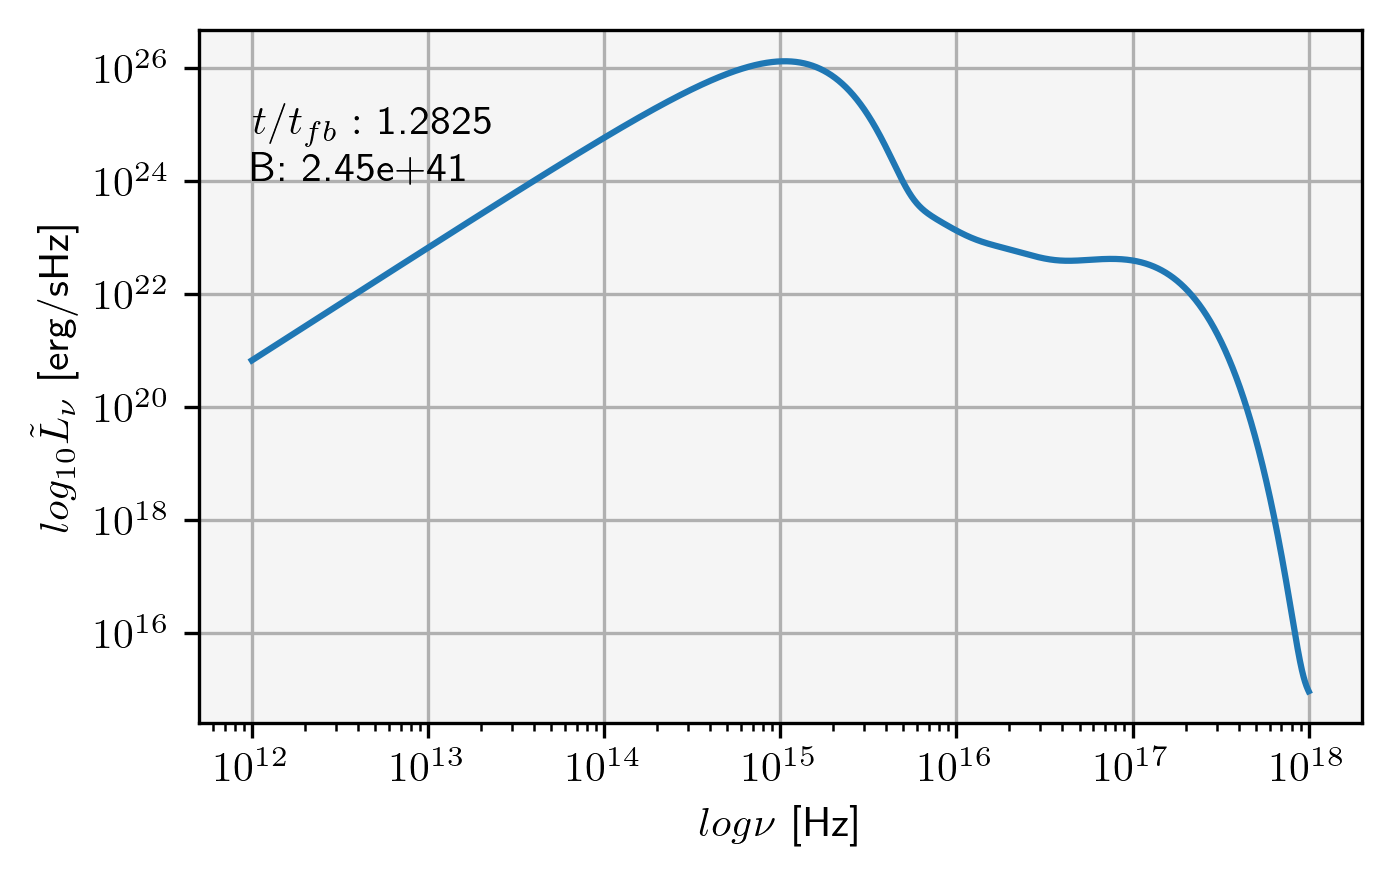

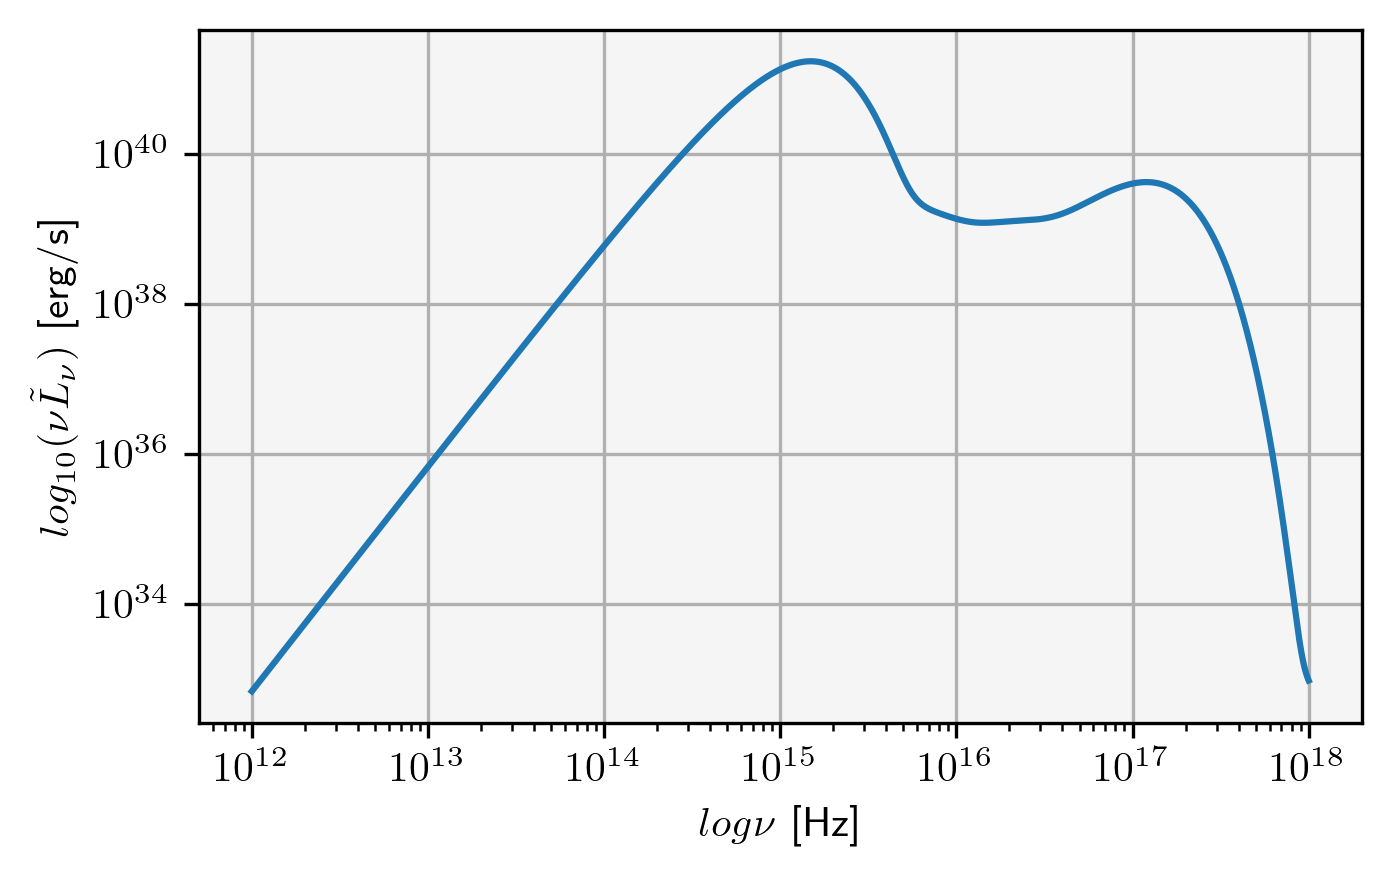

In [43]:
fig, ax = plt.subplots()
ax.plot(10**n_linear_in_log, lum_tilde_n)
plt.xlabel(r'$log\nu$ [Hz]')
plt.ylabel(r'$log_{10}\tilde{L}_\nu$ [erg/sHz]')
plt.loglog()
plt.grid()
plt.text(1e12, 1e24, r'$t/t_{fb}:$ ' + f'{days[fix_index]}\n B: {check}')
# plt.legend()
#plt.savefig('Ltildan_m' + str(m) + '_snap' + str(fix))
plt.show()
ax.axvline(15, color = 'tab:orange')
ax.axvline(17, color = 'tab:orange')
ax.axvspan(15, 17, alpha=0.5, color = 'tab:orange')


plt.figure()
plt.plot(10**n_linear_in_log, 10**n_linear_in_log * lum_tilde_n)
plt.xlabel(r'$log\nu$ [Hz]')
plt.ylabel(r'$log_{10}(\nu\tilde{L}_\nu)$ [erg/s]')
plt.loglog()
plt.grid()
#plt.savefig('n_Ltildan_m' + str(m) + '_snap' + str(fix))
plt.show()